In [6]:
import pandas as pd

In [7]:
def sort_data(filename='test_data.csv', output_filename='sorted_test_data.csv'):
    df = pd.read_csv(filename, parse_dates=['Datum'])
    df = df.sort_values(by='Datum')
    df.to_csv(output_filename, index=False)

In [8]:
sort_data()

In [9]:
df = pd.read_csv('sorted_test_data.csv')
df.head()

,Datum,Den_v_tydnu,Porucha
0,2023-01-01,6,0
1,2023-01-02,0,0
2,2023-01-03,1,0
3,2023-01-04,2,2
4,2023-01-05,3,0


In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Načtení dat z CSV souboru
df = pd.read_csv('sorted_test_data.csv', parse_dates=['Datum'], index_col='Datum')

In [ ]:
# Sezónní dekompozice
result = seasonal_decompose(df['Porucha'], model='additive', period=7)  # Perioda 7 odpovídá týdnu

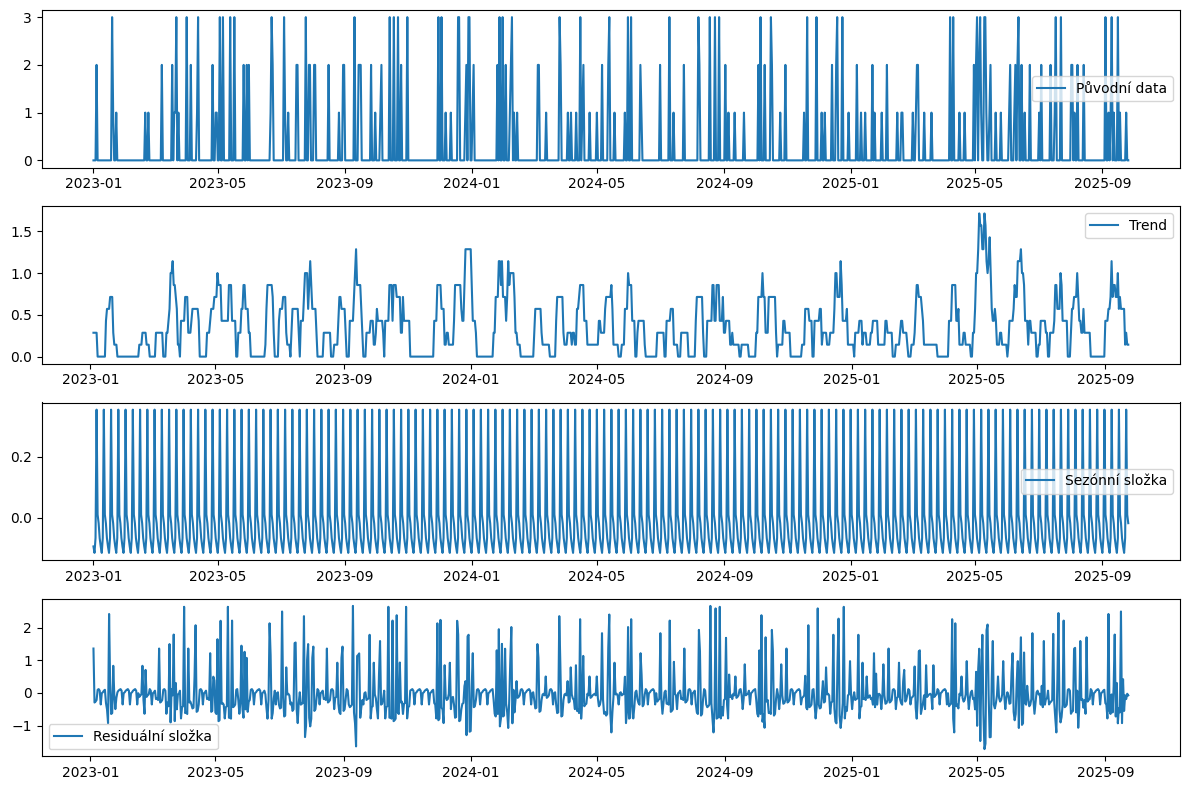

In [19]:
# Vykreslení výsledků dekompozice
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Porucha'], label='Původní data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Sezónní složka')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuální složka')
plt.legend()

plt.tight_layout()
plt.show()


Test na stacionaritu časové řady je důležitým krokem při analýze časových dat, zejména při přípravě dat pro modelování. Stacionarita znamená, že základní statistické vlastnosti řady, jako jsou průměr nebo variance, jsou konstantní v čase. Nestačionární časové řady mají tendenci mít změny v průměru, trendu nebo sezónnosti, což může ovlivnit výsledky modelování.

Test na stacionaritu obvykle zahrnuje nulovou hypotézu (H0) a alternativní hypotézu (H1):

Nulová hypotéza (H0): Časová řada je nestacionární.
Alternativní hypotéza (H1): Časová řada je stacionární.
Testování na stacionaritu časové řady lze provést různými statistickými metodami, a Augmented Dickey-Fuller test je jednou z nich. Výsledek tohoto testu zahrnuje ADF statistiku a p-hodnotu.

ADF Statistika: Čím nižší hodnota ADF, tím více důkazů máme proti nulové hypotéze (o nestacionaritě). Nižší hodnota ADF naznačuje vyšší pravděpodobnost, že můžeme zamítnout nulovou hypotézu a přijmout, že řada je stacionární.

p-hodnota: P-hodnota poskytuje pravděpodobnost toho, že můžeme zamítnout nulovou hypotézu. Pokud je p-hodnota nižší než určená hladina významnosti (např. 0,05), můžeme zamítnout nulovou hypotézu ve prospěch alternativní hypotézy.

Hodnoty ADF testu a p-hodnoty mohou být interpretovány takto:

Pokud je ADF Statistika menší než kritická hodnota a p-hodnota je nižší než hladina významnosti, můžeme zamítnout nulovou hypotézu a přijmout, že řada je stacionární.

Pokud ADF Statistika je vyšší než kritická hodnota nebo p-hodnota je vyšší než hladina významnosti, nemůžeme zamítnout nulovou hypotézu, což naznačuje, že řada je nestacionární.

In [20]:
# Test na stacionaritu časové řady
result = adfuller(df['Porucha'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -17.829349518022674
p-value: 3.1379033260576018e-30
Critical Values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}


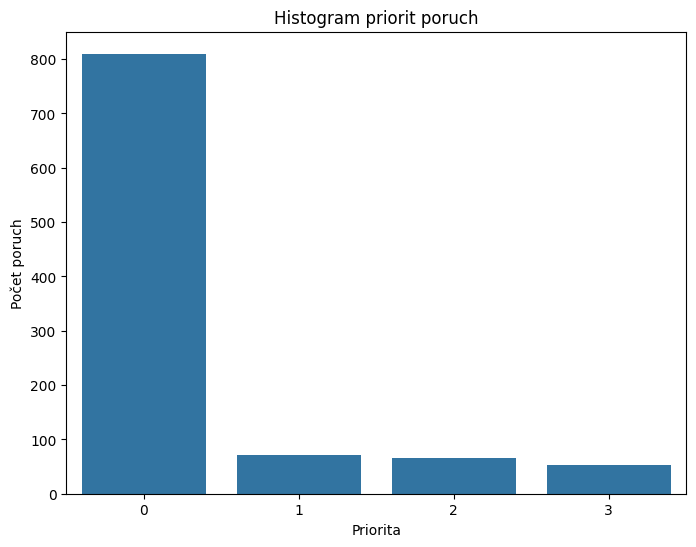

In [21]:
# Histogram priorit poruch
plt.figure(figsize=(8, 6))
sns.countplot(x='Porucha', data=df)
plt.title('Histogram priorit poruch')
plt.xlabel('Priorita')
plt.ylabel('Počet poruch')
plt.show()

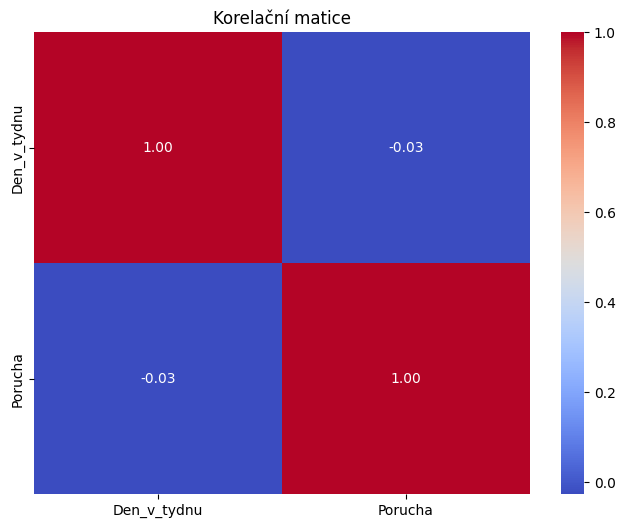

In [22]:
# Korelační matice
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelační matice')
plt.show()

In [23]:
# Zobraz 3 nejvýznamnější páry korelace
most_correlated = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated = most_correlated[most_correlated != 1]  # Vyřaď diagonální hodnoty (korelace se sebou samým)
most_correlated = most_correlated.drop_duplicates()

print("3 nejvýznamnější páry korelace:")
print(most_correlated.head(3))

3 nejvýznamnější páry korelace:
Den_v_tydnu  Porucha   -0.026827
dtype: float64
